<a href="https://colab.research.google.com/github/DemirHasicic/AIPortfolio/blob/main/Vjestacka%20Inteligencija%20Vjezbe/VI_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
`# This is formatted as code`
```



In [101]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')

In [102]:
data.describe()

,id,Prisustvo,UKUPNO
count,47.000000,47.000000,47.000000
mean,24.000000,8.085106,31.418511
std,13.711309,3.977271,12.927211
min,1.000000,0.000000,0.000000
25%,12.500000,10.000000,23.835000
50%,24.000000,10.000000,35.890000
75%,35.500000,10.000000,40.525000
max,47.000000,10.000000,50.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Prisustvo'}>],
       [<Axes: title={'center': 'UKUPNO'}>, <Axes: >]], dtype=object)

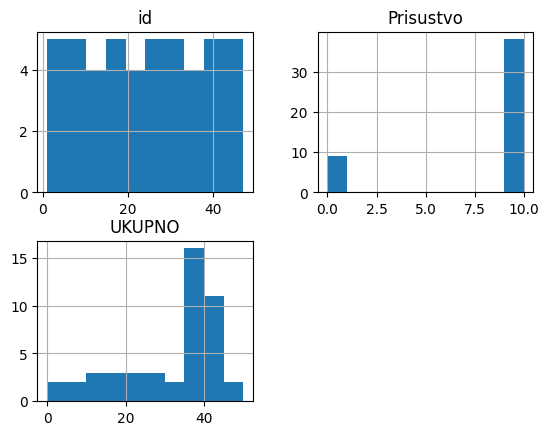

In [103]:
data.hist()

In [104]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4000,))) # broj neurona je prvi broj, ulazni sloj ima 4000 elemenata i to je broj atributa
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #zadnji sloj ima 1 neuron jer je binarna klasifikacija


In [105]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [106]:
import pandas as pd
red = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv', sep=';')
white = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-white.csv', sep=';')

In [107]:
#a)U odgovarajucim dataframe objektima dodati novu kolonu label koja ce imati vrijednost 0 za podatke bijelog vina, a vrijednost 1 za podatke crnog vina
red['label'] = '1'
white['label'] = '0'
#frames = [red, white]
#wines = pd.concat(frames)
wines = white.append(red)


<ipython-input-107-d165c8d40422>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wines = white.append(red)


In [108]:
#b)Prikaz osnovnih podataka spojenog skupa koristenjem describe modela te nacrtati histogram
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

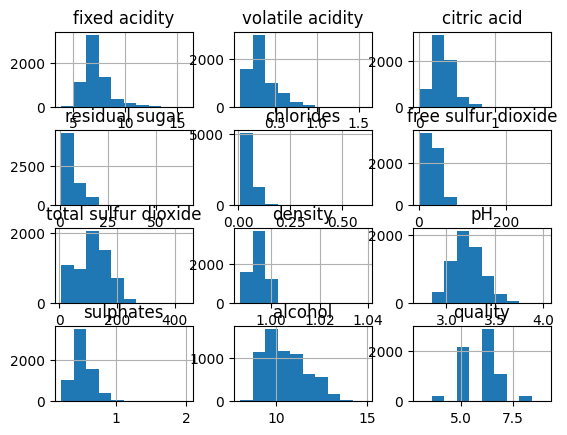

In [109]:
wines.hist()

In [110]:
#c)Iz wines izdvojiti x - karakteristike i y - labele
x = wines.loc[:, wines.columns != "label"].to_numpy() #izdvajanje atributa
y = wines["label"].to_numpy() #izdvajanje labela
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [111]:
#d) Sekvencijalni keras sloj koji ce imati 2 dense sloja sa po 8 neurona i relu aktivacijsku funkciju. Prvom sloju
#kao input shape prosliejditi parametar (12, ), izlazni sloj sa 1 neuronom
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(8, activation = 'relu', input_shape=(12,)))
network.add(layers.Dense(8, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))

In [112]:
#e)Koristi adam optimizator, za funkciju gubitka binary_crossentropy, a kao metriku accuracy
network.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

def prepare_inputs(x_train, x_test):
    oe = OrdinalEncoder()
    oe.fit(x_train)  # Note: Use lowercase "x_train" here for consistency
    x_train_enc = oe.transform(x_train)
    x_test_enc = oe.transform(x_test)
    return x_train_enc, x_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc




In [114]:
print(x_test,y_test)

[[ 9.9    0.35   0.41  ...  0.5    9.5    5.   ]
 [ 8.3    0.2    0.49  ...  0.37  10.1    5.   ]
 [ 4.7    0.455  0.18  ...  0.83  14.     7.   ]
 ...
 [ 7.7    0.835  0.    ...  0.52   9.3    5.   ]
 [ 6.7    0.23   0.33  ...  0.4   10.8    6.   ]
 [ 7.6    0.685  0.23  ...  0.61   9.3    5.   ]] ['1' '0' '0' ... '1' '0' '1']


In [115]:
print(x_train.dtype, x_test.dtype)
print(y_train.dtype, y_test.dtype)

float64 float64
object object
